In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
import random
import math
import seaborn as sns
sns.set(style="white")

%matplotlib inline

In [2]:
loc = "data/Part 6 - Reinforcement Learning/Section 32 - Upper Confidence Bound (UCB)/Python/"

dataset = pd.read_csv(loc + 'Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
# Implementing Random Selection
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

Text(0, 0.5, 'Number of times each ad was selected')

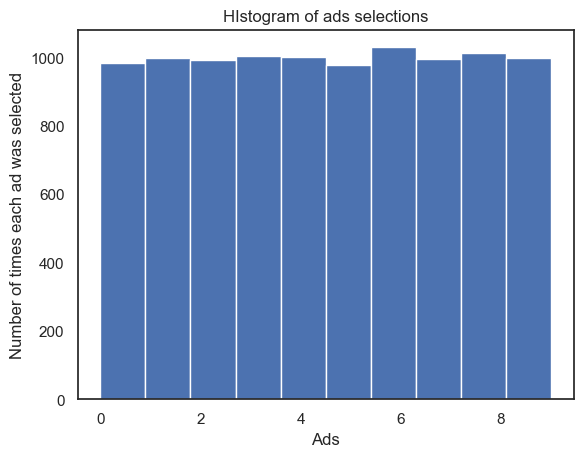

In [4]:
# Visualising the results - Histogram
plt.hist(ads_selected)
plt.title('HIstogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')

In [7]:
# Implementing UCB
N = 10000
d = 10
ads_selected = []
total_reward = 0
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):          
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = (3/2 * math.log(n + 1) / numbers_of_selections[i]) ** .5
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] =  numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [8]:
total_reward

2178

Text(0, 0.5, 'Number of times each ad was selected')

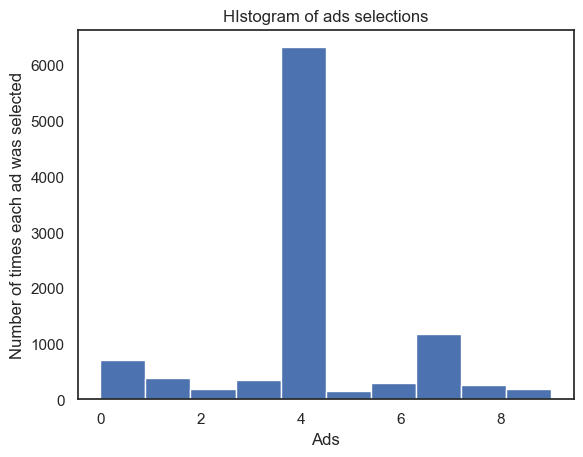

In [9]:
# Visualising the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')